# Random Forest

Random Forest has the benefit of using an array of decision, which individually consider various subsets of features and samples of the data. The aggregation of diverse trees often leads to more robust and accurate predictions than a single decision tree.

---

### Essential Libraries

We will first import the essential Python Libraries.  

> `NumPy` : Library for Numeric Computations in Python  
> `Pandas` : Library for Data Acquisition and Preparation  
> `Seaborn` : Higher-level library for Data Visualization  
> `Matplotlib` : Low-level library for Data Visualization  
> `Librosa` : Library for audio and music analysis, provides tools for music and audio processing, such as loading audio files, extracting features, manipulating audio signals, and more   
> `os` : Module that provides a way of using operating system dependent functionality, like reading or writing to the file system, managing paths, etc <br>
> `sklearn` : Library for supervised and unsupervised learning algorithms, model fitting, data preprocessing, model selection, and evaluation in Python 

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import librosa
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

### Import the audio data

This function is used to extract features from an audio file.

In [4]:
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40, hop_length=int(sample_rate*0.01), n_fft=int(sample_rate*0.02))
        if mfccs.shape[1] < 44:  # Assuming at least 44 frames for 1 second of audio
            mfccs = np.pad(mfccs, ((0, 0), (0, 44 - mfccs.shape[1])), mode='constant', constant_values=(0, 0))
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}, error: {e}")
        return None
    return mfccs_processed

In [5]:
train_audio_dirs = {
    'Cello': 'split/Cello', 
    'Flute': 'split/Flute', 
    'Piano': 'split/Piano', 
    'Violin': 'split/Violin' 
}

In [6]:
features = []
labels = []

In [7]:
for instrument, directory in train_audio_dirs.items():
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            data = extract_features(file_path)

            if data is not None:
                features.append(data)
                labels.append(instrument)

The features and labels are converted into NumPy arrays and the feature dataset is normalized

In [8]:
X = np.array(features)
y = np.array(labels)

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Random Forest

This is where the random forest classifier is being initialised.

In [9]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

The dataset is split into its train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The classifier is then trained on the train set

In [11]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
X_test.size

62760

In [13]:
y_pred = rf_classifier.predict(X_test)

### Random Forest Evaluation

The classifier is evaluated

In [14]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       Cello       1.00      0.99      0.99       504
       Flute       0.97      0.90      0.93       135
       Piano       0.97      0.99      0.98       453
      Violin       0.99      1.00      1.00       477

    accuracy                           0.99      1569
   macro avg       0.98      0.97      0.98      1569
weighted avg       0.99      0.99      0.99      1569

Accuracy: 0.9859783301465902


The results from the test set are shown below using a confusion matrix and a heatmap

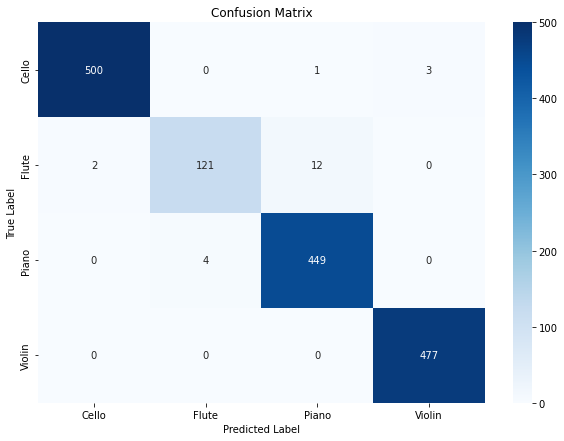

In [15]:
conf_mat = confusion_matrix(y_test, y_pred)

conf_mat_df = pd.DataFrame(conf_mat, index=train_audio_dirs.keys(), columns=train_audio_dirs.keys())

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Cello accuracy rate = 99.2% <br>
Flute accuracy rate = 89.6% <br>
Piano accuracy rate = 99.1%<br>
Violen accuracy rate = 100%<br>